In [28]:
import tensorflow as tf
from tensorflow import keras

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from tensorflow.math import confusion_matrix

import pickle



In [29]:
# load npy file

X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


In [30]:
# print shape

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1280, 224, 224, 3)
(1280,)
(320, 224, 224, 3)
(320,)


In [31]:
# print type

print(type(X_train))
print(type(y_train))

print(type(X_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
output_map={
    7:"NV",
    6:"MEL",
    5:"BCC",
    4:"BKL",
    3:"AK",
    2:"SCC",
    1:"VASC",
    0:"DF"
}

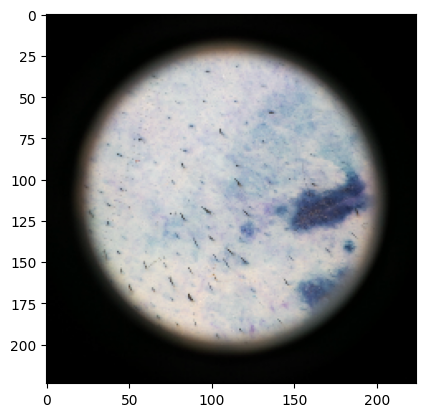

In [33]:
img=X_train[10]
plt.imshow(img)
plt.show()

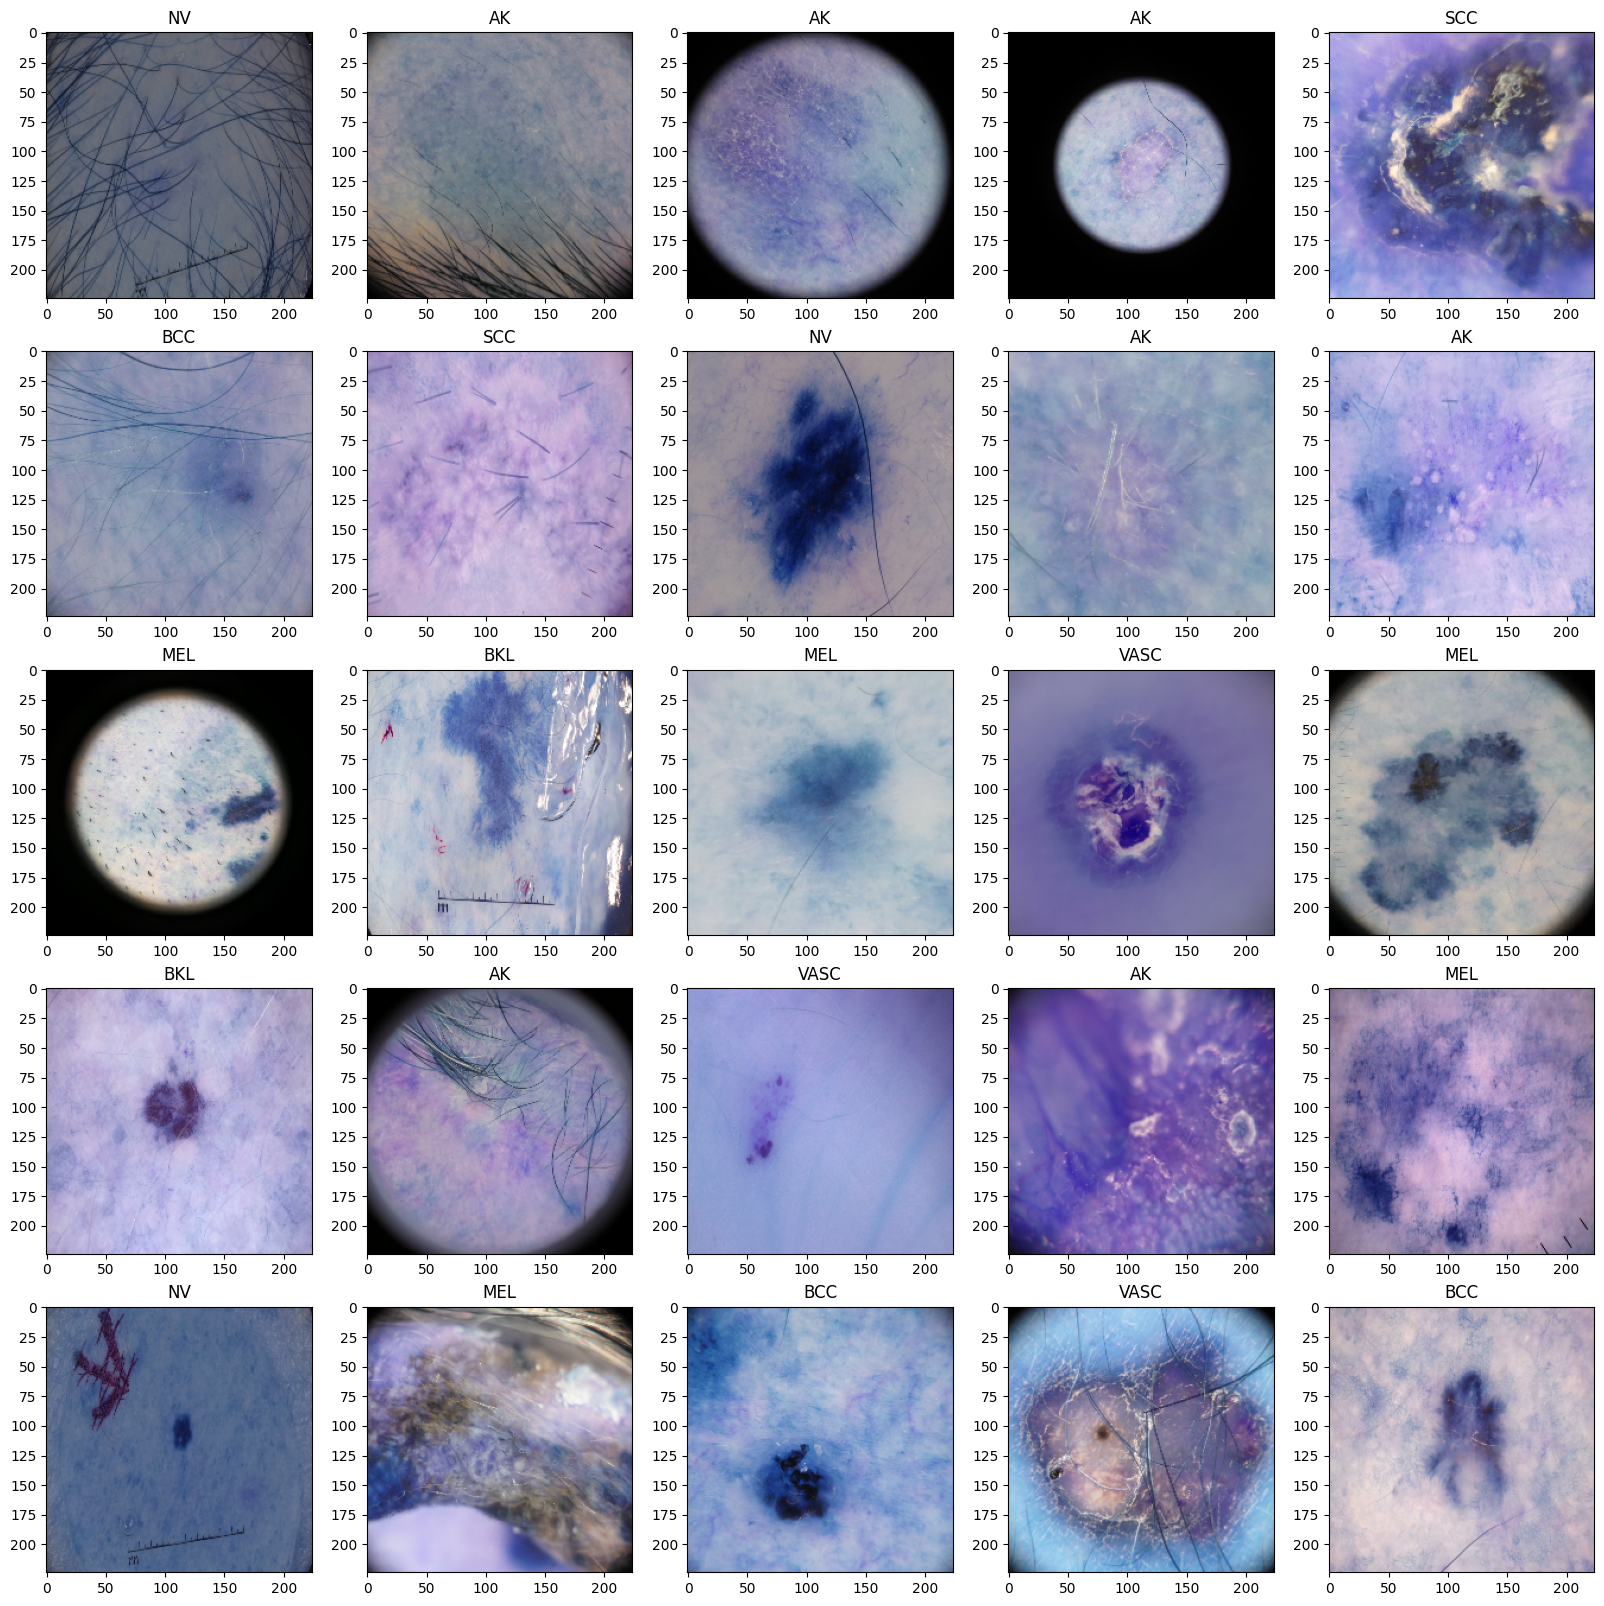

In [34]:
# print train images

plt.figure(figsize=(20,20))

for i in range(25):
    plt.subplot(5,5,i+1)
    img=X_train[i]
    plt.imshow(img)
    plt.title(output_map[y_train[i]])
plt.show()

In [35]:

# create model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224,3)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(8, activation='sigmoid')
])


In [36]:

# compile model
model.compile(
    optimizer='adam', 
    loss="sparse_categorical_crossentropy", 
    metrics=['accuracy']
)

In [38]:
# train model
model.fit(X_train,y_train, epochs=30)


Epoch 1/30
40/40 [==============================] - 23s 469ms/step - loss: 2.8952 - accuracy: 0.1844
Epoch 2/30
40/40 [==============================] - 18s 443ms/step - loss: 2.2426 - accuracy: 0.2156
Epoch 3/30
40/40 [==============================] - 22s 542ms/step - loss: 2.4901 - accuracy: 0.2062
Epoch 4/30
40/40 [==============================] - 23s 576ms/step - loss: 2.2445 - accuracy: 0.1844
Epoch 5/30
40/40 [==============================] - 20s 497ms/step - loss: 2.0667 - accuracy: 0.2242
Epoch 6/30
40/40 [==============================] - 22s 560ms/step - loss: 2.3431 - accuracy: 0.1828
Epoch 7/30
40/40 [==============================] - 23s 574ms/step - loss: 2.1073 - accuracy: 0.1922
Epoch 8/30
40/40 [==============================] - 23s 569ms/step - loss: 2.0032 - accuracy: 0.2305
Epoch 9/30
40/40 [==============================] - 20s 493ms/step - loss: 2.0432 - accuracy: 0.2180
Epoch 10/30
40/40 [==============================] - 19s 486ms/step - loss: 2.0861 - accura

Accuracy Way too low

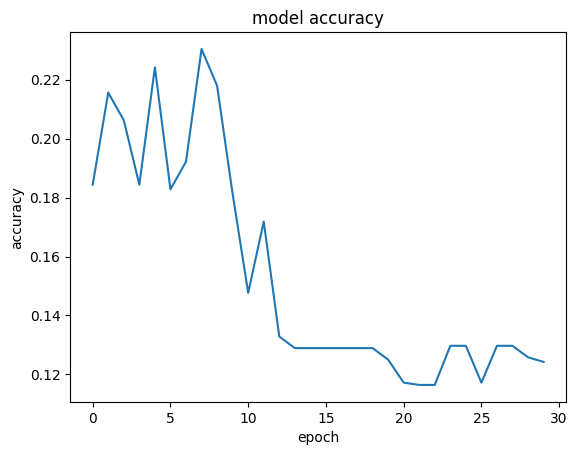

In [39]:
# plot epochs graphs

plt.plot(model.history.history['accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

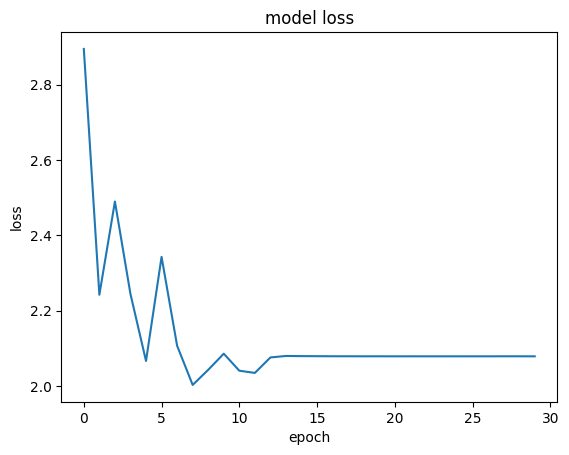

In [40]:
# plot epochs graphs

plt.plot(model.history.history['loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [41]:
# validate model

train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=2)

print('\ntrain accuracy:', train_acc)

40/40 - 6s - loss: 2.0789 - accuracy: 0.1297 - 6s/epoch - 160ms/step

train accuracy: 0.12968750298023224


In [48]:
y= model.predict(X_train)
y.shape

40/40 [==============================] - 11s 49ms/step


(1280, 8)

In [49]:
y_lab= [np.argmax(i) for i in y]
print(y_lab)

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [51]:
confusion_matrix(y_train,y_lab)


<tf.Tensor: shape=(8, 8), dtype=int32, numpy=
array([[  0,   0,   0,   0,   0,   0,   0, 159],
       [  0,   0,   0,   0,   0,   0,   0, 152],
       [  0,   0,   0,   0,   0,   0,   0, 153],
       [  0,   0,   0,   0,   0,   0,   0, 165],
       [  0,   0,   0,   0,   0,   0,   0, 165],
       [  0,   0,   0,   0,   0,   0,   0, 156],
       [  0,   0,   0,   0,   0,   0,   0, 164],
       [  0,   0,   0,   0,   0,   0,   0, 166]])>

In [52]:
accuracy_score(y_train,y_lab)

0.1296875

In [42]:
# evaluate model

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10/10 - 1s - loss: 2.0841 - accuracy: 0.1063 - 500ms/epoch - 50ms/step

Test accuracy: 0.10625000298023224


In [43]:
y= model.predict(X_test)
y.shape

10/10 [==============================] - 1s 47ms/step


(320, 8)

In [44]:
y_lab= [np.argmax(i) for i in y]
print(y_lab)

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [45]:
confusion_matrix(y_test,y_lab)

<tf.Tensor: shape=(8, 8), dtype=int32, numpy=
array([[ 0,  0,  0,  0,  0,  0,  0, 41],
       [ 0,  0,  0,  0,  0,  0,  0, 48],
       [ 0,  0,  0,  0,  0,  0,  0, 47],
       [ 0,  0,  0,  0,  0,  0,  0, 35],
       [ 0,  0,  0,  0,  0,  0,  0, 35],
       [ 0,  0,  0,  0,  0,  0,  0, 44],
       [ 0,  0,  0,  0,  0,  0,  0, 36],
       [ 0,  0,  0,  0,  0,  0,  0, 34]])>

In [46]:
accuracy_score(y_test,y_lab)

0.10625

In [47]:
output_map[7]

'NV'

**Model predicting everything as 7**